In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import datetime
import linear_regression_pipeline as lgp
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

%config InlineBackend.figure_format = 'svg'
%matplotlib inline
sns.set(color_codes=True)
plt.style.use('seaborn-colorblind')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.precision', 2)

In [13]:
final_features_usa = ['budget', 'budget * is_summer_release',
                      'budget * is_xmas_release', 'oscar_wins',
                      'imdb_user_rating', 'imdb_user_rating_count',
                      'years_since_release']

final_features_japan = ['imdb_user_rating_count',
                        'non_oscar_wins', 'years_since_release',
                        'is_golden_week_release', 'is_summer_release',
                        'is_xmas_release']

budget = ['budget']

target = ['global_gross']

In [144]:
cv_records

[{'model': 'USA',
  'label': 'features_11_usa',
  'mean_train_score': 0.697,
  'mean_val_score': 0.686},
 {'model': 'USA',
  'label': 'features_12_usa',
  'mean_train_score': 0.737,
  'mean_val_score': 0.725},
 {'model': 'USA',
  'label': 'features_13_usa',
  'mean_train_score': 0.744,
  'mean_val_score': 0.731},
 {'model': 'USA',
  'label': 'features_14_usa',
  'mean_train_score': 0.7,
  'mean_val_score': 0.685},
 {'model': 'USA',
  'label': 'features_15_usa',
  'mean_train_score': 0.698,
  'mean_val_score': 0.682},
 {'model': 'USA',
  'label': 'final_features_usa',
  'mean_train_score': 0.697,
  'mean_val_score': 0.686},
 {'model': 'Japan',
  'label': 'features_1_japan',
  'mean_train_score': 0.496,
  'mean_val_score': 0.29},
 {'model': 'Japan',
  'label': 'features_2_japan',
  'mean_train_score': 0.494,
  'mean_val_score': 0.285},
 {'model': 'Japan',
  'label': 'features_3_japan',
  'mean_train_score': 0.492,
  'mean_val_score': 0.282},
 {'model': 'Japan',
  'label': 'features_4_jap

In [139]:
japan_df[japan_df['title'] == 'My Neighbor Totoro']

,title,country,runtime_minutes,budget,global_gross,mpaa_rating,genres,imdb_user_rating,imdb_user_rating_count,oscar_wins,non_oscar_wins,metascore,release_date,years_since_release,is_golden_week_release,is_summer_release,is_xmas_release,is_Action,is_Adventure,is_Animation,is_Biography,is_Comedy,is_Crime,is_Drama,is_Family,is_Fantasy,is_History,is_Horror,is_Music,is_Musical,is_Mystery,is_News,is_Romance,is_Sci-Fi,is_Sport,is_Thriller,is_War,is_Western,No Rating,PG,PG-13,R,TV-MA,TV-PG,budget * is_golden_week_release,budget * is_summer_release,budget * is_xmas_release,imdb_user_rating**2,years_since_release**2,non_oscar_wins * is_golden_week_release,non_oscar_wins * is_summer_release,non_oscar_wins * is_xmas_release,imdb_user_rating_count * is_golden_week_release,imdb_user_rating_count * is_summer_release,imdb_user_rating_count * is_xmas_release,residual
479,My Neighbor Totoro,Japan,86.0,3.70e+06,3.05e+07,G,"[Animation, Family, Fantasy]",8.2,274203.0,0.0,5.0,86.0,1988-04-16,32.0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,67.24,1024.0,0.0,0.0,0.0,0.0,0.0,0.0,6.36e+07


In [108]:
japan_df.sort_values('global_gross', ascending=False).head()

,title,country,runtime_minutes,budget,global_gross,mpaa_rating,genres,imdb_user_rating,imdb_user_rating_count,oscar_wins,non_oscar_wins,metascore,release_date,years_since_release,is_golden_week_release,is_summer_release,is_xmas_release,is_Action,is_Adventure,is_Animation,is_Biography,is_Comedy,is_Crime,is_Drama,is_Family,is_Fantasy,is_History,is_Horror,is_Music,is_Musical,is_Mystery,is_News,is_Romance,is_Sci-Fi,is_Sport,is_Thriller,is_War,is_Western,No Rating,PG,PG-13,R,TV-MA,TV-PG,budget * is_golden_week_release,budget * is_summer_release,budget * is_xmas_release,imdb_user_rating**2,years_since_release**2,non_oscar_wins * is_golden_week_release,non_oscar_wins * is_summer_release,non_oscar_wins * is_xmas_release,imdb_user_rating_count * is_golden_week_release,imdb_user_rating_count * is_summer_release,imdb_user_rating_count * is_xmas_release,residual
129,Your Name.,Japan,106.0,3.46e+06,3.59e+08,PG,"[Animation, Drama, Fantasy, Romance]",8.4,173629.0,0.0,15.0,79.0,2016-08-26,4.0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.0,3.46e+06,0.0,70.56,16.0,0.0,15.0,0.0,0.0,173629.0,0.0,-2.41e+08
421,Spirited Away,Japan,125.0,1.90e+07,3.51e+08,PG,"[Animation, Adventure, Family, Fantasy, Mystery]",8.6,619245.0,1.0,57.0,96.0,2001-07-20,19.0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,1.90e+07,0.0,73.96,361.0,0.0,57.0,0.0,0.0,619245.0,0.0,3.79e+07
395,Howl's Moving Castle,Japan,119.0,2.40e+07,2.36e+08,PG,"[Animation, Adventure, Family, Fantasy]",8.2,314461.0,0.0,14.0,80.0,2004-10-12,16.0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0.00e+00,0.0,67.24,256.0,0.0,0.0,0.0,0.0,0.0,0.0,-9.26e+07
340,Ponyo,Japan,101.0,3.40e+07,2.03e+08,G,"[Animation, Adventure, Comedy, Family, Fantasy]",7.7,118561.0,0.0,12.0,86.0,2008-07-19,12.0,0,1,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,3.40e+07,0.0,59.29,144.0,0.0,12.0,0.0,0.0,118561.0,0.0,-1.14e+08
41,Weathering with You,Japan,112.0,1.11e+07,1.93e+08,PG-13,"[Animation, Drama, Family, Fantasy, Romance]",7.6,14246.0,0.0,4.0,72.0,2019-07-19,1.0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.0,1.11e+07,0.0,57.76,1.0,0.0,4.0,0.0,0.0,14246.0,0.0,-1.58e+08


In [33]:
usa_df.sort_values('global_gross', ascending=False).head()

,title,country,runtime_minutes,budget,global_gross,mpaa_rating,genres,imdb_user_rating,imdb_user_rating_count,oscar_wins,non_oscar_wins,metascore,release_date,years_since_release,is_golden_week_release,is_summer_release,is_xmas_release,is_Action,is_Adventure,is_Animation,is_Biography,is_Comedy,is_Crime,is_Drama,is_Family,is_Fantasy,is_History,is_Horror,is_Music,is_Musical,is_Mystery,is_News,is_Romance,is_Sci-Fi,is_Sport,is_Thriller,is_War,is_Western,No Rating,Other,PG,PG-13,R,budget * is_golden_week_release,budget * is_summer_release,budget * is_xmas_release,imdb_user_rating**2,years_since_release**2,budget**2,oscar_wins**2,imdb_user_rating_count**2,budget * oscar_wins,budget * imdb_user_rating
10,The Lion King,USA,118.0,2.60e+08,1.66e+09,PG,"[Animation, Adventure, Drama, Family, Musical]",6.9,195765.0,0.0,16.0,55.0,2019-07-19,1.0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,2.60e+08,0.0,47.61,1.0,6.76e+16,0.0,3.83e+10,0.00e+00,1.79e+09
5,Frozen II,USA,103.0,1.50e+08,1.45e+09,PG,"[Animation, Adventure, Comedy, Family, Fantasy...",6.9,116436.0,0.0,15.0,64.0,2019-11-22,1.0,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.00e+00,0.0,47.61,1.0,2.25e+16,0.0,1.36e+10,0.00e+00,1.04e+09
158,Frozen,USA,102.0,1.50e+08,1.28e+09,PG,"[Animation, Adventure, Comedy, Family, Fantasy...",7.4,557569.0,2.0,79.0,75.0,2013-11-27,7.0,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.00e+00,0.0,54.76,49.0,2.25e+16,4.0,3.11e+11,3.00e+08,1.11e+09
44,Incredibles 2,USA,118.0,2.00e+08,1.24e+09,PG,"[Animation, Action, Adventure, Comedy, Family,...",7.6,236501.0,0.0,12.0,80.0,2018-06-15,2.0,0,1,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.0,2.00e+08,0.0,57.76,4.0,4.00e+16,0.0,5.59e+10,0.00e+00,1.52e+09
124,Minions,USA,91.0,7.40e+07,1.16e+09,PG,"[Animation, Adventure, Comedy, Family, Sci-Fi]",6.4,206572.0,0.0,0.0,56.0,2015-07-10,5.0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.0,7.40e+07,0.0,40.96,25.0,5.48e+15,0.0,4.27e+10,0.00e+00,4.74e+08


In [152]:
with open('final_usa_df_2.pickle', 'wb') as to_write:
    pickle.dump(usa_df, to_write)
    
with open('final_japan_df_2.pickle', 'wb') as to_write:
    pickle.dump(japan_df, to_write)

In [3]:
with open('final_usa_df.pickle', 'rb') as read_file:
    usa_df = pickle.load(read_file)
    
with open('final_japan_df.pickle', 'rb') as read_file:
    japan_df = pickle.load(read_file)
    
with open('cv_records.pickle', 'rb') as read_file:
    cv_records = pickle.load(read_file)

In [149]:
japan_df[japan_df['title'] == 'Your Name.']

,title,country,runtime_minutes,budget,global_gross,mpaa_rating,genres,imdb_user_rating,imdb_user_rating_count,oscar_wins,non_oscar_wins,metascore,release_date,years_since_release,is_golden_week_release,is_summer_release,is_xmas_release,is_Action,is_Adventure,is_Animation,is_Biography,is_Comedy,is_Crime,is_Drama,is_Family,is_Fantasy,is_History,is_Horror,is_Music,is_Musical,is_Mystery,is_News,is_Romance,is_Sci-Fi,is_Sport,is_Thriller,is_War,is_Western,No Rating,PG,PG-13,R,TV-MA,TV-PG,budget * is_golden_week_release,budget * is_summer_release,budget * is_xmas_release,imdb_user_rating**2,years_since_release**2,non_oscar_wins * is_golden_week_release,non_oscar_wins * is_summer_release,non_oscar_wins * is_xmas_release,imdb_user_rating_count * is_golden_week_release,imdb_user_rating_count * is_summer_release,imdb_user_rating_count * is_xmas_release,residual
129,Your Name.,Japan,106.0,3.46e+06,3.59e+08,PG,"[Animation, Drama, Fantasy, Romance]",8.4,173629.0,0.0,15.0,79.0,2016-08-26,4.0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.0,3.46e+06,0.0,70.56,16.0,0.0,15.0,0.0,0.0,173629.0,0.0,-2.41e+08


In [86]:
usa_df['residual'] = usa_model.predict(usa_X) - usa_y

In [150]:
usa_df['abs residual'] = abs(usa_model.predict(usa_X) - usa_y)

In [151]:
japan_df['abs residual'] = abs(japan_model.predict(japan_X) - japan_y)

In [89]:
japan_df['residual'] = japan_model.predict(japan_X) - japan_y

In [153]:
usa_df.sort_values('abs residual', ascending=False).head()

,title,country,runtime_minutes,budget,global_gross,mpaa_rating,genres,imdb_user_rating,imdb_user_rating_count,oscar_wins,non_oscar_wins,metascore,release_date,years_since_release,is_golden_week_release,is_summer_release,is_xmas_release,is_Action,is_Adventure,is_Animation,is_Biography,is_Comedy,is_Crime,is_Drama,is_Family,is_Fantasy,is_History,is_Horror,is_Music,is_Musical,is_Mystery,is_News,is_Romance,is_Sci-Fi,is_Sport,is_Thriller,is_War,is_Western,No Rating,Other,PG,PG-13,R,budget * is_golden_week_release,budget * is_summer_release,budget * is_xmas_release,imdb_user_rating**2,years_since_release**2,budget**2,oscar_wins**2,imdb_user_rating_count**2,budget * oscar_wins,budget * imdb_user_rating,residual,abs residual
5,Frozen II,USA,103.0,1.50e+08,1.45e+09,PG,"[Animation, Adventure, Comedy, Family, Fantasy...",6.9,116436.0,0.0,15.0,64.0,2019-11-22,1.0,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.00e+00,0.0,47.61,1.0,2.25e+16,0.0,1.36e+10,0.00e+00,1.04e+09,-1.07e+09,1.07e+09
124,Minions,USA,91.0,7.40e+07,1.16e+09,PG,"[Animation, Adventure, Comedy, Family, Sci-Fi]",6.4,206572.0,0.0,0.0,56.0,2015-07-10,5.0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.0,7.40e+07,0.0,40.96,25.0,5.48e+15,0.0,4.27e+10,0.00e+00,4.74e+08,-8.22e+08,8.22e+08
68,Despicable Me 3,USA,89.0,8.00e+07,1.03e+09,PG,"[Animation, Adventure, Comedy, Family, Fantasy...",6.3,107452.0,0.0,0.0,49.0,2017-06-30,3.0,0,1,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.0,8.00e+07,0.0,39.69,9.0,6.40e+15,0.0,1.15e+10,0.00e+00,5.04e+08,-7.44e+08,7.44e+08
267,WALL·E,USA,98.0,1.80e+08,5.21e+08,G,"[Animation, Adventure, Family, Sci-Fi]",8.4,968505.0,1.0,91.0,95.0,2008-06-27,12.0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,1.80e+08,0.0,70.56,144.0,3.24e+16,1.0,9.38e+11,1.80e+08,1.51e+09,7.31e+08,7.31e+08
10,The Lion King,USA,118.0,2.60e+08,1.66e+09,PG,"[Animation, Adventure, Drama, Family, Musical]",6.9,195765.0,0.0,16.0,55.0,2019-07-19,1.0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,2.60e+08,0.0,47.61,1.0,6.76e+16,0.0,3.83e+10,0.00e+00,1.79e+09,-7.16e+08,7.16e+08


In [154]:
japan_df.sort_values('abs residual', ascending=False).head()

,title,country,runtime_minutes,budget,global_gross,mpaa_rating,genres,imdb_user_rating,imdb_user_rating_count,oscar_wins,non_oscar_wins,metascore,release_date,years_since_release,is_golden_week_release,is_summer_release,is_xmas_release,is_Action,is_Adventure,is_Animation,is_Biography,is_Comedy,is_Crime,is_Drama,is_Family,is_Fantasy,is_History,is_Horror,is_Music,is_Musical,is_Mystery,is_News,is_Romance,is_Sci-Fi,is_Sport,is_Thriller,is_War,is_Western,No Rating,PG,PG-13,R,TV-MA,TV-PG,budget * is_golden_week_release,budget * is_summer_release,budget * is_xmas_release,imdb_user_rating**2,years_since_release**2,non_oscar_wins * is_golden_week_release,non_oscar_wins * is_summer_release,non_oscar_wins * is_xmas_release,imdb_user_rating_count * is_golden_week_release,imdb_user_rating_count * is_summer_release,imdb_user_rating_count * is_xmas_release,residual,abs residual
129,Your Name.,Japan,106.0,3.46e+06,3.59e+08,PG,"[Animation, Drama, Fantasy, Romance]",8.4,173629.0,0.0,15.0,79.0,2016-08-26,4.0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.0,3.46e+06,0.0,70.56,16.0,0.0,15.0,0.0,0.0,173629.0,0.0,-2.41e+08,2.41e+08
41,Weathering with You,Japan,112.0,1.11e+07,1.93e+08,PG-13,"[Animation, Drama, Family, Fantasy, Romance]",7.6,14246.0,0.0,4.0,72.0,2019-07-19,1.0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.0,1.11e+07,0.0,57.76,1.0,0.0,4.0,0.0,0.0,14246.0,0.0,-1.58e+08,1.58e+08
438,Pokémon: The First Movie - Mewtwo Strikes Back,Japan,96.0,3.00e+07,1.64e+08,G,"[Animation, Action, Adventure, Family, Fantasy...",6.3,38984.0,0.0,3.0,35.0,1998-07-18,22.0,0,1,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0.0,3.00e+07,0.0,39.69,484.0,0.0,3.0,0.0,0.0,38984.0,0.0,-1.33e+08,1.33e+08
434,Pokémon the Movie 2000,Japan,84.0,3.00e+07,1.34e+08,G,"[Animation, Action, Adventure, Family, Fantasy]",6.1,20229.0,0.0,0.0,28.0,1999-07-17,21.0,0,1,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,3.00e+07,0.0,37.21,441.0,0.0,0.0,0.0,0.0,20229.0,0.0,-1.19e+08,1.19e+08
340,Ponyo,Japan,101.0,3.40e+07,2.03e+08,G,"[Animation, Adventure, Comedy, Family, Fantasy]",7.7,118561.0,0.0,12.0,86.0,2008-07-19,12.0,0,1,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,3.40e+07,0.0,59.29,144.0,0.0,12.0,0.0,0.0,118561.0,0.0,-1.14e+08,1.14e+08


In [84]:
usa_X.shape
usa_y.shape

(474, 7)

(474, 1)

In [4]:
japan_df.shape
usa_df.shape

(496, 55)

(474, 53)

In [5]:
usa_X, usa_y = lgp.feature_target_selection(final_features_usa, target, usa_df)

usa_X_train_val, usa_X_test, usa_y_train_val, usa_y_test = lgp.initial_split(usa_X, usa_y)

In [15]:
usa_X_budget, usa_y_budget = lgp.feature_target_selection(
    budget, target, usa_df)

usa_X_budget_train_val, usa_X_budget_test, usa_y_budget_train_val, usa_y_budget_test = lgp.initial_split(
    usa_X_budget, usa_y_budget)

In [16]:
usa_budget_model = lgp.final_train_and_test(
    usa_X_budget_train_val, usa_y_budget_train_val, usa_X_budget_test, usa_y_budget_test)

Training R^2:                  0.511
Test R^2:                      0.476 

Training MAE:                  131310566.476
Test MAE:                      100442436.096 

Intercept:                     -64976268.254276335

Feature coefficients: 

budget                         3.84


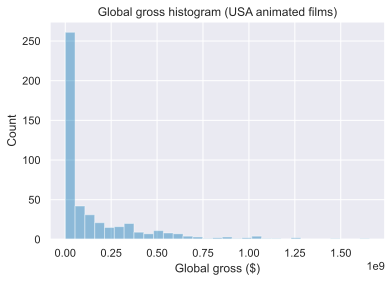

In [143]:
global_gross_hist_usa = sns.distplot(usa_df['global_gross'], kde=False)
plt.xlabel('Global gross ($)')
plt.ylabel('Count')
plt.title('Global gross histogram (USA animated films)')
plt.savefig('global_gross_hist_usa.png');

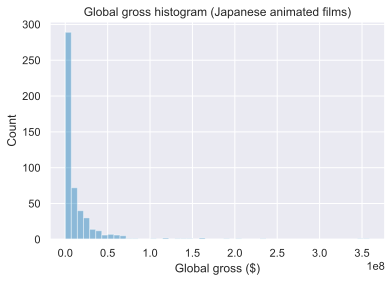

In [142]:
global_gross_hist_usa = sns.distplot(japan_df['global_gross'], kde=False)
plt.xlabel('Global gross ($)')
plt.ylabel('Count')
plt.title('Global gross histogram (Japanese animated films)')
plt.savefig('global_gross_hist_japan.png');

In [85]:
japan_df['global_gross'].median()
usa_df['global_gross'].median()

4576767.0

35910756.0

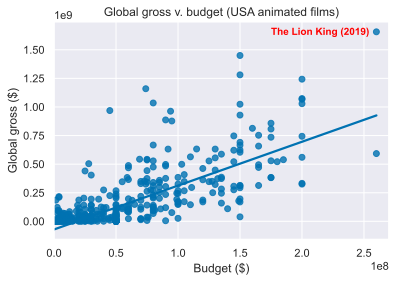

In [148]:
budget_plot = sns.regplot(x='budget', y='global_gross', data=usa_df, ci=None)
budget_plot.text(1.75e8, 1.63e9, 'The Lion King (2019)',
                 horizontalalignment='left', size='small', color='red', weight='semibold')
budget_plot.axes.set_xlim(0, 2.7e8)
plt.xlabel('Budget ($)')
plt.ylabel('Global gross ($)')
plt.title('Global gross v. budget (USA animated films)')
plt.savefig('budget_lr_plot.png');

In [6]:
japan_X, japan_y = lgp.feature_target_selection(final_features_japan, target, japan_df)

japan_X_train_val, japan_X_test, japan_y_train_val, japan_y_test = lgp.initial_split(japan_X, japan_y)

In [7]:
lgp.split_and_simple_validate(usa_X_train_val, usa_y_train_val)

Training R^2:                  0.704
Validation R^2:                0.654
Intercept:                     -111954458.2929228

Feature coefficients: 

budget                         2.30
budget * is_summer_release     0.83
budget * is_xmas_release       0.31
oscar_wins                     49451473.54
imdb_user_rating               11299242.52
imdb_user_rating_count         655.18
years_since_release            -631750.04


In [11]:
lgp.cv(usa_X_train_val, usa_y_train_val, cv_records)

[0.70265757 0.68402035 0.68958487 0.72814402 0.68207569]
Mean train R^2:      0.697 

[0.65454051 0.76449434 0.70369794 0.59503011 0.71466035]
Mean val R^2:        0.686
Model: N/A
Iteration description: N/A


In [12]:
lgp.cv(japan_X_train_val, japan_y_train_val, cv_records)

[0.41481462 0.46069966 0.50851569 0.50893103 0.576595  ]
Mean train R^2:      0.494 

[ 0.61623609  0.55022999 -0.30907538  0.29107051  0.2766872 ]
Mean val R^2:        0.285
Model: N/A
Iteration description: N/A


In [8]:
lgp.split_and_simple_validate(japan_X_train_val, japan_y_train_val)

Training R^2:                  0.407
Validation R^2:                0.57
Intercept:                     10383636.33475189

Feature coefficients: 

imdb_user_rating_count         311.88
non_oscar_wins                 4892813.53
years_since_release            -399292.15
is_golden_week_release         -13242069.41
is_summer_release              3960905.12
is_xmas_release                4739095.65


In [9]:
usa_model = lgp.final_train_and_test(usa_X_train_val, usa_y_train_val, usa_X_test, usa_y_test)

Training R^2:                  0.695
Test R^2:                      0.661 

Training MAE:                  92742534.376
Test MAE:                      73133756.759 

Intercept:                     -102574114.13735682

Feature coefficients: 

budget                         2.25
budget * is_summer_release     0.99
budget * is_xmas_release       0.19
oscar_wins                     41484604.23
imdb_user_rating               10066891.63
imdb_user_rating_count         676.18
years_since_release            -760422.17


In [10]:
japan_model = lgp.final_train_and_test(japan_X_train_val, japan_y_train_val, japan_X_test, japan_y_test)

Training R^2:                  0.491
Test R^2:                      0.059 

Training MAE:                  15242610.013
Test MAE:                      15286223.419 

Intercept:                     11169263.83874692

Feature coefficients: 

imdb_user_rating_count         279.97
non_oscar_wins                 3596523.12
years_since_release            -369800.85
is_golden_week_release         -9869910.32
is_summer_release              6034622.74
is_xmas_release                2255158.46


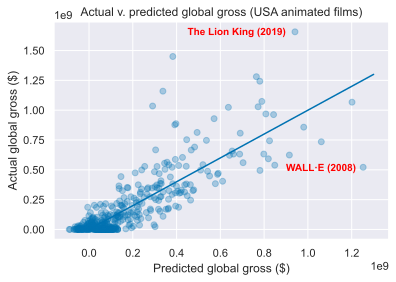

In [146]:
# USA: More often underpredict true global_gross
# My prediction error increases for movies with larger global grosses, which 
# indicates heteroskedasticity in my residuals (aka error terms)
plt.scatter(usa_model.predict(usa_X), usa_y, alpha=0.3)
plt.plot([0, 1.3e9], [0, 1.3e9]);
plt.text(0.9e9, 0.49e9, 'WALL·E (2008)',
                 horizontalalignment='left', size='small', color='red', weight='semibold')
plt.text(0.45e9, 1.63e9, 'The Lion King (2019)',
                 horizontalalignment='left', size='small', color='red', weight='semibold')
plt.xlabel('Predicted global gross ($)')
plt.ylabel('Actual global gross ($)')
plt.title('Actual v. predicted global gross (USA animated films)')
plt.savefig('avp_global_gross_usa.png');

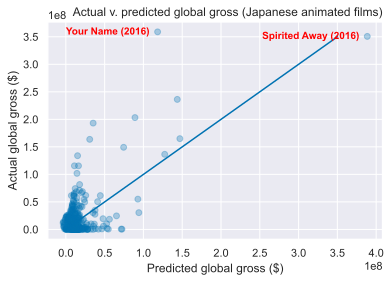

In [147]:
# Japan: More often underpredict true global_gross
# My prediction error increases for movies with larger global grosses, which 
# indicates heteroskedasticity in my residuals (aka error terms)
plt.scatter(japan_model.predict(japan_X), japan_y, alpha=0.3)
plt.text(0, 3.54e8, 'Your Name (2016)',
                 horizontalalignment='left', size='small', color='red', weight='semibold')
plt.text(2.53e8, 3.46e8, 'Spirited Away (2016)',
                 horizontalalignment='left', size='small', color='red', weight='semibold')
plt.plot([0, 3.5e8], [0, 3.5e8]);
plt.xlabel('Predicted global gross ($)')
plt.ylabel('Actual global gross ($)')
plt.title('Actual v. predicted global gross (Japanese animated films)', loc='right')
plt.savefig('avp_global_gross_japan.png');

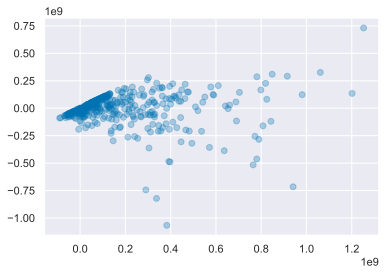

In [105]:
plt.scatter(usa_model.predict(usa_X), usa_df['residual'], alpha=0.3);

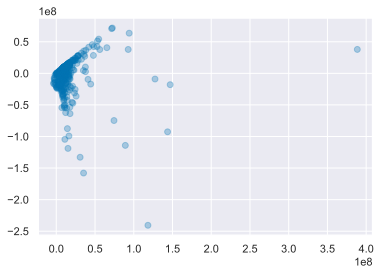

In [106]:
plt.scatter(japan_model.predict(japan_X), japan_df['residual'], alpha=0.3);